In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

In [2]:
variant_data = pd.read_csv('../data/processed_data/gnomad1.tsv', sep='\t') 

/tmp/ipykernel_182434/502907785.py:1: DtypeWarning: Columns (24,25,26,27,28,29,30,31,39,40,41,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  variant_data = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/gnomad1.tsv', sep='\t')


In [3]:
variant_data.head()

,CHROM,POS,ID,REF,ALT,AC,AC_afr,AC_amr,AC_nfe,AC_asj,...,BIOTYPE,EXON,INTRON,ALLELE_NUM,VARIANT_CLASS,CANONICAL,LoF,LoF_filter,LoF_flags,LoF_info
0,chr1,12541,NaN,C,G,1,0,1,0,0,...,transcribed_unprocessed_pseudogene,NaN,2/5,1,SNV,YES,NaN,NaN,NaN,NaN
1,chr1,12541,NaN,C,G,1,0,1,0,0,...,processed_transcript,NaN,1/2,1,SNV,NaN,NaN,NaN,NaN,NaN
2,chr1,12541,NaN,C,G,1,0,1,0,0,...,unprocessed_pseudogene,NaN,NaN,1,SNV,YES,NaN,NaN,NaN,NaN
3,chr1,12541,NaN,C,G,1,0,1,0,0,...,miRNA,NaN,NaN,1,SNV,YES,NaN,NaN,NaN,NaN
4,chr1,12541,NaN,C,G,1,0,1,0,0,...,transcribed_pseudogene,NaN,NaN,1,SNV,YES,NaN,NaN,NaN,NaN


In [4]:
conseq_in_prot = variant_data[
    (variant_data['Feature_Type'] == 'Transcript') & 
    (variant_data['BIOTYPE'] == 'protein_coding') ]

values_to_filter = ['stop_gained', 'frameshift_variant', 'splice_donor_variant', 'splice_acceptor_variant']

filtered_conseq_in_prot = conseq_in_prot[conseq_in_prot['Consequence'].isin(values_to_filter)]

In [5]:
filtered_conseq_in_prot_ref = filtered_conseq_in_prot[filtered_conseq_in_prot['Feature'].str.contains('ENST|NM')]

In [6]:
sum_ac_per_transcript = filtered_conseq_in_prot_ref.groupby('Feature')['AC']

transcript_list = []

for key, group in sum_ac_per_transcript:
    transcript_list.append(key)

In [7]:
sum_ac_per_transcript = filtered_conseq_in_prot_ref.groupby('Feature')['AC']

sum_ac = []

for key, group in sum_ac_per_transcript:
    unique_values = group.sum()  # Extract the unique values
    sum_ac.append(unique_values)

population_ac = ['AC_afr', 'AC_amr', 'AC_nfe', 'AC_asj', 'AC_sas', 'AC_eas', 'AC_mid', 'AC_fin']

sum_population_ac = [[], [], [], [], [], [], [], []]


for idx, el in enumerate(population_ac):
    sum_population = []
    sum_AC_per_transcript = filtered_conseq_in_prot_ref.groupby('Feature')[el]
    for key, group in sum_AC_per_transcript:
        unique_values = group.sum()
        sum_population.append(unique_values)
        sum_population_ac[idx].append(sum(sum_population))
        sum_population = []

gene_name_per_transcript = filtered_conseq_in_prot_ref.groupby('Feature')['SYMBOL']
gene_names = []

for key, group in gene_name_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_names.extend(unique_values)

gene_id_per_transcript = filtered_conseq_in_prot_ref.groupby('Feature')['Gene']

gene_id = []

for key, group in gene_id_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_id.extend(unique_values)

alt_per_transcript = filtered_conseq_in_prot_ref.groupby('Feature')['ALT']

alt_sum = []

for key, group in alt_per_transcript:
    unique_values = len(group.sum())
    alt_sum.append(unique_values)

In [8]:
transcripts_df_ac_nlog1 = pd.DataFrame({
    'Transcript_ID': transcript_list,
    'AC': np.log1p(sum_ac),
    'AC_afr': np.log1p(sum_population_ac[0]),
    'AC_amr': np.log1p(sum_population_ac[1]),
    'AC_nfe': np.log1p(sum_population_ac[2]),
    'AC_asj': np.log1p(sum_population_ac[3]),
    'AC_sas': np.log1p(sum_population_ac[4]),
    'AC_eas': np.log1p(sum_population_ac[5]),
    'AC_mid': np.log1p(sum_population_ac[6]),
    'AC_fin': np.log1p(sum_population_ac[7]),
    'Gene_name': gene_names,
    'Gene_id': gene_id,
    'Variant': alt_sum
})

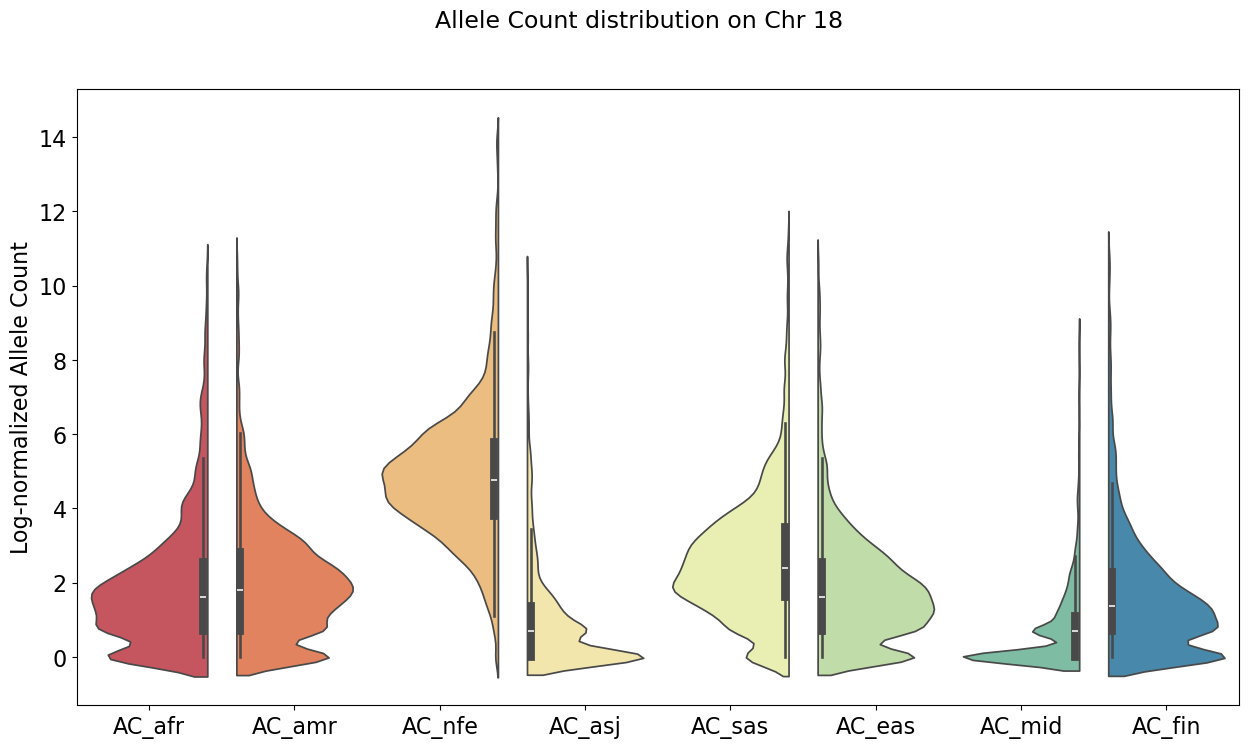

In [9]:
plt.figure(figsize=(15, 8))
custom_palette = sns.color_palette("Spectral", 8)
ax = sns.violinplot(data=transcripts_df_ac_nlog1[['AC_afr', 'AC_amr', 'AC_nfe', 'AC_asj', 'AC_sas', 'AC_eas', 'AC_mid', 'AC_fin']], palette=custom_palette, split=True)
ax.set_ylabel('Log-normalized Allele Count', fontsize=16) 
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.suptitle('Allele Count distribution on Chr 18', fontsize=17)
plt.show()

In [10]:
transcripts_df_ac = pd.DataFrame({
    'Transcript_ID': transcript_list,
    'AC': sum_ac,
    'AC_afr': sum_population_ac[0],
    'AC_amr': sum_population_ac[1],
    'AC_nfe': sum_population_ac[2],
    'AC_asj': sum_population_ac[3],
    'AC_sas': sum_population_ac[4],
    'AC_eas': sum_population_ac[5],
    'AC_mid': sum_population_ac[6],
    'AC_fin': sum_population_ac[7],
    'Gene_name': gene_names,
    'Gene_id': gene_id,
    'Variant': alt_sum
})

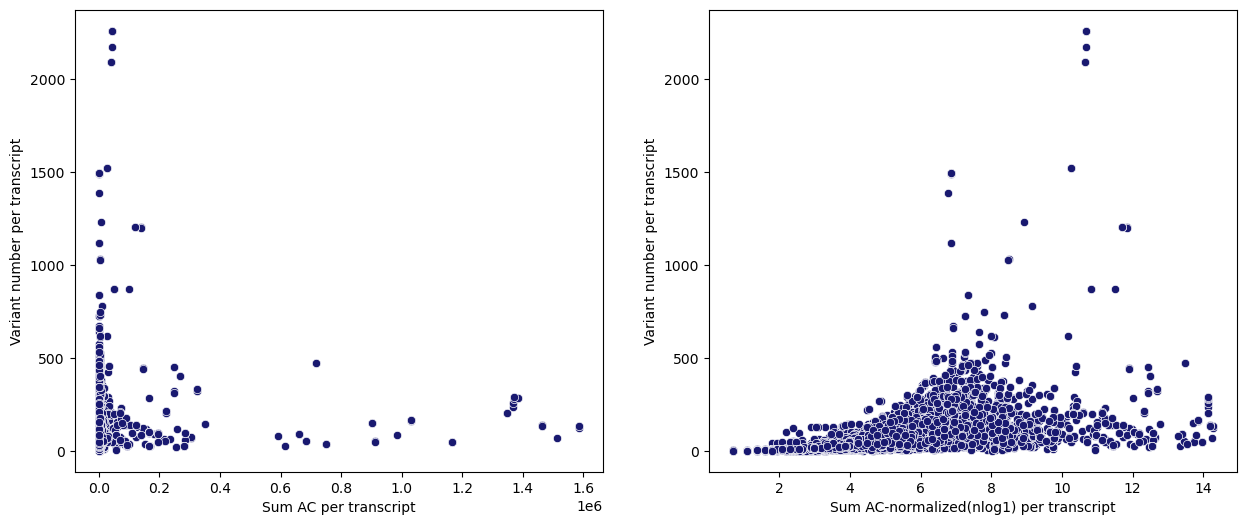

In [11]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='AC', 
    y='Variant', 
    data=transcripts_df_ac, color = 'midnightblue')
plt.xlabel(
    'Sum AC per transcript')
plt.ylabel(
    'Variant number per transcript')

plt.subplot(1, 2, 2)
sns.scatterplot(
    x='AC', 
    y='Variant', 
    data=transcripts_df_ac_nlog1, color = 'midnightblue')
plt.xlabel(
    'Sum AC-normalized(nlog1) per transcript')
plt.ylabel(
    'Variant number per transcript');

plt.show() 

### Датафрейм с инфо по ВСЕМ транскриптам

In [12]:
transcripts_df_ac

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant
0,ENST00000003583,546,48,9,190,0,39,233,4,3,STPG1,ENSG00000001460,60
1,ENST00000003912,192,4,1,160,2,8,4,0,4,NIPAL3,ENSG00000001461,64
2,ENST00000008440,80,0,0,72,0,1,1,0,1,SPRTN,ENSG00000010072,34
3,ENST00000009105,136,2,1,103,0,15,1,1,3,CAMK1G,ENSG00000008118,57
4,ENST00000010299,104,2,4,67,4,11,1,1,10,FAM76A,ENSG00000009780,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,NM_213566.2,550,13,5,300,138,24,15,0,0,DFFA,1676,65
13673,NM_213593.5,67,10,0,48,0,6,2,0,0,DIO1,1733,45
13674,NM_213651.3,1037,36,45,594,81,83,87,6,44,SLC25A24,29957,154
13675,NM_213652.4,143,0,3,114,0,9,6,0,2,HJV,148738,47


In [13]:
transcripts_df_ac['Gene_name'].nunique()

1986

### Датафрейм с инфо ТОЛЬКО по ENST

In [14]:
transcripts_df_ac_enst = transcripts_df_ac[transcripts_df_ac['Transcript_ID'].str.contains('ENST')]
transcripts_df_ac_enst

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant
0,ENST00000003583,546,48,9,190,0,39,233,4,3,STPG1,ENSG00000001460,60
1,ENST00000003912,192,4,1,160,2,8,4,0,4,NIPAL3,ENSG00000001461,64
2,ENST00000008440,80,0,0,72,0,1,1,0,1,SPRTN,ENSG00000010072,34
3,ENST00000009105,136,2,1,103,0,15,1,1,3,CAMK1G,ENSG00000008118,57
4,ENST00000010299,104,2,4,67,4,11,1,1,10,FAM76A,ENSG00000009780,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,ENST00000693629,88,0,1,77,0,5,2,1,0,PIGV,ENSG00000060642,39
7670,ENST00000693642,19,0,0,19,0,0,0,0,0,TAF12,ENSG00000120656,11
7671,ENST00000693673,392,10,13,276,4,32,18,3,5,CLCC1,ENSG00000121940,136
7672,ENST00000693720,210,6,11,143,1,31,4,2,2,PPP1R15B,ENSG00000158615,103


In [15]:
transcripts_df_ac_enst['Gene_name'].nunique()

1972

In [16]:
transcripts_df_ac_enst['AC/Variant'] = transcripts_df_ac['AC']/transcripts_df_ac['Variant']
transcripts_df_ac_enst

/tmp/ipykernel_182434/3842131641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts_df_ac_enst['AC/Variant'] = transcripts_df_ac['AC']/transcripts_df_ac['Variant']


,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant
0,ENST00000003583,546,48,9,190,0,39,233,4,3,STPG1,ENSG00000001460,60,9.100000
1,ENST00000003912,192,4,1,160,2,8,4,0,4,NIPAL3,ENSG00000001461,64,3.000000
2,ENST00000008440,80,0,0,72,0,1,1,0,1,SPRTN,ENSG00000010072,34,2.352941
3,ENST00000009105,136,2,1,103,0,15,1,1,3,CAMK1G,ENSG00000008118,57,2.385965
4,ENST00000010299,104,2,4,67,4,11,1,1,10,FAM76A,ENSG00000009780,71,1.464789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,ENST00000693629,88,0,1,77,0,5,2,1,0,PIGV,ENSG00000060642,39,2.256410
7670,ENST00000693642,19,0,0,19,0,0,0,0,0,TAF12,ENSG00000120656,11,1.727273
7671,ENST00000693673,392,10,13,276,4,32,18,3,5,CLCC1,ENSG00000121940,136,2.882353
7672,ENST00000693720,210,6,11,143,1,31,4,2,2,PPP1R15B,ENSG00000158615,103,2.038835


In [17]:
print("Пропущенные значения в датафрейме:")
print(transcripts_df_ac_enst.isnull().any())

print("\nСтроки с пропущенными значениями в колонке 'Gene_name':")
print(transcripts_df_ac_enst.loc[transcripts_df_ac_enst['Gene_name'].isnull()])

Пропущенные значения в датафрейме:
Transcript_ID    False
AC               False
AC_afr           False
AC_amr           False
AC_nfe           False
AC_asj           False
AC_sas           False
AC_eas           False
AC_mid           False
AC_fin           False
Gene_name         True
Gene_id          False
Variant          False
AC/Variant       False
dtype: bool

Строки с пропущенными значениями в колонке 'Gene_name':
        Transcript_ID    AC  AC_afr  AC_amr  AC_nfe  AC_asj  AC_sas  AC_eas  \
2563  ENST00000370548    91      20      15      41       4       8       1   
3788  ENST00000417456    27       0       1      24       0       1       0   
3839  ENST00000419891    11       0       2       6       0       2       1   
3849  ENST00000420220    27       1       0      20       0       4       1   
4103  ENST00000431696    19       1       0      13       0       4       0   
4126  ENST00000432920   173      19       7     122       0      11       5   
4960  ENST00000473363

In [18]:
transcripts_df_ac_enst['Gene_name'].fillna(transcripts_df_ac_enst['Gene_id'], inplace=True)
print(transcripts_df_ac_enst.isnull().any())

Transcript_ID    False
AC               False
AC_afr           False
AC_amr           False
AC_nfe           False
AC_asj           False
AC_sas           False
AC_eas           False
AC_mid           False
AC_fin           False
Gene_name        False
Gene_id          False
Variant          False
AC/Variant       False
dtype: bool


/tmp/ipykernel_182434/1653734856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transcripts_df_ac_enst['Gene_name'].fillna(transcripts_df_ac_enst['Gene_id'], inplace=True)
/tmp/ipykernel_182434/1653734856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts_df_ac_enst['Gene_name'].fillna(transcripts_df_ac_enst['Gene_id'], inpla

In [19]:
transcripts_df_ac_enst['Gene_name'].nunique()

1992

In [20]:
expression_metric = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/max_tissue_median_expr.tsv', delimiter='\t')

In [21]:
expression_metric

,ID_transcript,ID_gene,Max_median_expression
0,ENST00000373020.8,ENSG00000000003.14,47.10
1,ENST00000494424.1,ENSG00000000003.14,17.97
2,ENST00000496771.5,ENSG00000000003.14,22.57
3,ENST00000612152.4,ENSG00000000003.14,3.51
4,ENST00000614008.4,ENSG00000000003.14,48.55
...,...,...,...
199319,ENST00000610912.1,ENSG00000284594.1,0.00
199320,ENST00000618984.1,ENSG00000284595.1,0.00
199321,ENST00000578629.1,ENSG00000284596.1,0.00
199322,ENST00000638236.1,ENSG00000284600.1,1.06


In [22]:
transcripts = transcripts_df_ac_enst['Transcript_ID'].unique()
expression = []

for transcript in transcripts:
    expression_level = list(expression_metric[expression_metric['ID_transcript'].str.contains(transcript)]['Max_median_expression'])
    try:
        expression.append(expression_level[0])
    except:
        expression.append(np.nan)
len(expression)

7674

In [23]:
transcripts_df_ac_enst['Max_median_expression'] = expression
transcripts_df_ac_enst

/tmp/ipykernel_182434/408802437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts_df_ac_enst['Max_median_expression'] = expression


,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant,Max_median_expression
0,ENST00000003583,546,48,9,190,0,39,233,4,3,STPG1,ENSG00000001460,60,9.100000,10.45
1,ENST00000003912,192,4,1,160,2,8,4,0,4,NIPAL3,ENSG00000001461,64,3.000000,21.22
2,ENST00000008440,80,0,0,72,0,1,1,0,1,SPRTN,ENSG00000010072,34,2.352941,0.49
3,ENST00000009105,136,2,1,103,0,15,1,1,3,CAMK1G,ENSG00000008118,57,2.385965,0.41
4,ENST00000010299,104,2,4,67,4,11,1,1,10,FAM76A,ENSG00000009780,71,1.464789,6.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,ENST00000693629,88,0,1,77,0,5,2,1,0,PIGV,ENSG00000060642,39,2.256410,NaN
7670,ENST00000693642,19,0,0,19,0,0,0,0,0,TAF12,ENSG00000120656,11,1.727273,NaN
7671,ENST00000693673,392,10,13,276,4,32,18,3,5,CLCC1,ENSG00000121940,136,2.882353,NaN
7672,ENST00000693720,210,6,11,143,1,31,4,2,2,PPP1R15B,ENSG00000158615,103,2.038835,NaN


In [24]:
transcripts_df_ac_enst['Gene_name'].nunique()

1992

In [25]:
genes = transcripts_df_ac_enst['Gene_name'].unique()
genes_min = []
genes_max = []
genes_acn_range = []
median_mean_expression = []

for gene in genes:
    list_ac_var = list(transcripts_df_ac_enst.loc[transcripts_df_ac_enst['Gene_name'] == gene]['AC/Variant'])
    if len(list_ac_var) > 1:
        genes_min.append(min(list_ac_var))
        genes_max.append(max(list_ac_var))
        if min(list_ac_var) == max(list_ac_var):
            genes_acn_range.append(max(list_ac_var))
        else:
            genes_acn_range.append((max(list_ac_var)/min(list_ac_var)))
    else:
        genes_min.append(min(list_ac_var))
        genes_max.append(max(list_ac_var))
        genes_acn_range.append(max(list_ac_var))
    list_expression = list(transcripts_df_ac_enst.loc[transcripts_df_ac_enst['Gene_name'] == gene]['Max_median_expression'])
    if len(list_ac_var) > 1:
        median_mean_expression.append(statistics.median(list_expression))
    else:
        median_mean_expression.append(max(list_expression))

print(len(genes), len(genes_acn_range), len(genes_min), len(genes_max), len(median_mean_expression))

1992 1992 1992 1992 1992


In [26]:
plof_metrics_genes = pd.read_table('/home/bioinf/gnomad-variants/raw_data/plof_metrics/gnomad.v2.1.1.lof_metrics.by_gene.txt')

In [27]:
loeuf = []
for gene in genes:
    e_lof = list(plof_metrics_genes.loc[plof_metrics_genes['gene'] == gene]['oe_lof_upper'])
    try:
        loeuf.append(e_lof[0])
    except:
        loeuf.append(None)
len(loeuf)

1992

In [28]:
genes_conserv = pd.DataFrame({
    'Gene_name': genes,
    'AC/N_min': genes_min,
    'AC/N_max': genes_max,
    'AC/N_range': genes_acn_range,
    'LOEUF': loeuf,
    'Max_median_expression': median_mean_expression 
}).sort_values(by='AC/N_range', ascending=False)
genes_conserv

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression
984,OR2T4,19209.897436,19209.897436,19209.897436,0.936,0.025
316,WNT4,0.866667,11328.000000,13070.769231,0.651,1.170
1936,OR10X1,12920.849057,12920.849057,12920.849057,1.847,0.000
1965,OR2T12,11658.545455,11658.545455,11658.545455,NaN,NaN
169,ST3GAL3,0.714286,7095.625000,9933.875000,0.621,0.740
...,...,...,...,...,...,...
711,SFN,0.540000,0.540000,0.540000,0.704,733.800
1266,SYT11,0.500000,0.500000,0.500000,0.372,82.100
277,TNFSF4,0.440000,0.440000,0.440000,1.675,1.570
81,RNF11,0.317073,0.317073,0.317073,0.690,73.400


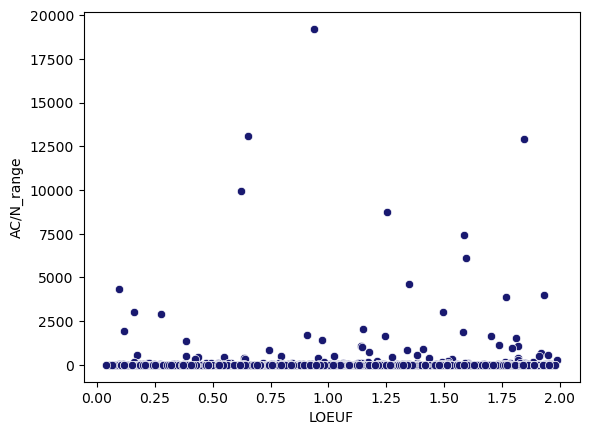

In [29]:
sns.scatterplot(
    x='LOEUF', 
    y='AC/N_range', 
    data=genes_conserv, color = 'midnightblue')
plt.xlabel(
    'LOEUF')
plt.ylabel(
    'AC/N_range');

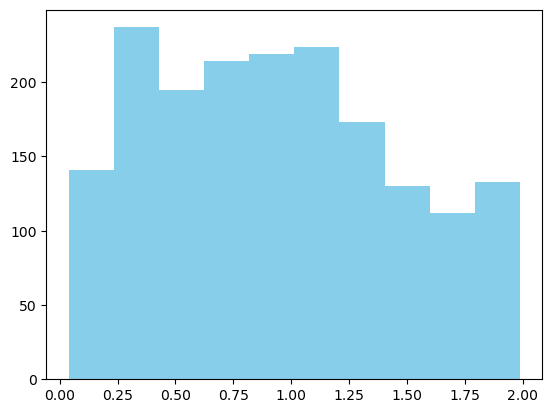

In [30]:
plt.hist(genes_conserv['LOEUF'], color='skyblue');

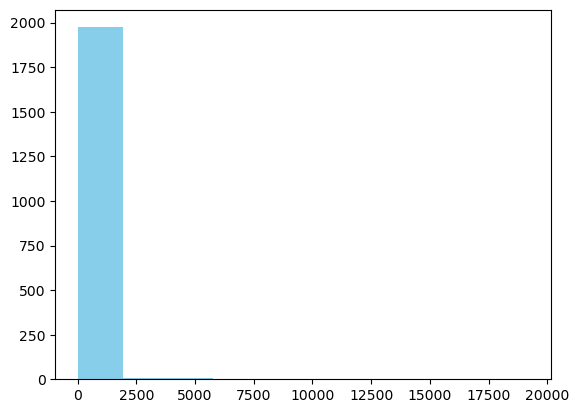

In [31]:
plt.hist(genes_conserv['AC/N_range'], color='skyblue');

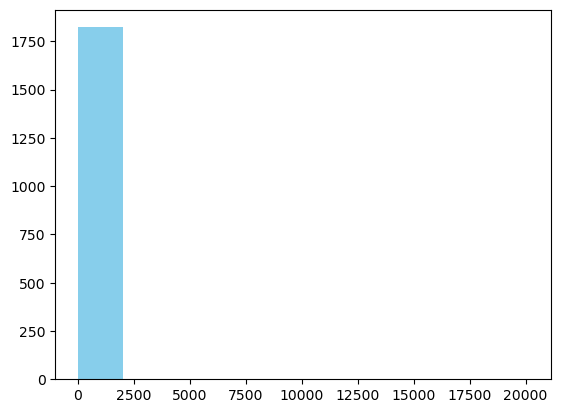

In [32]:
plt.hist(genes_conserv['Max_median_expression'], color='skyblue');

In [33]:
range_values = genes_conserv['AC/N_range']

In [34]:
mean_range = statistics.mean(range_values)

In [35]:
median_range = statistics.median(range_values)

In [36]:
q1 = np.percentile(range_values, 33.33)
median = np.percentile(range_values, 66.67)
q3 = np.percentile(range_values, 100)
print(q1, median, q3)

1.4193492440493183 3.3784999553050437 19209.897435897437


In [37]:
# Для разделения по range
def define_group_range(range):
    if range <= q1 and range > 1: # все транскрипты очень похожи (AC/N и маленькие, и большие), , AC/N для каждого транскрипта >= 1
        return 0
    elif range >= q3: # очень большой разброс в гене по наличию AC и N у lof-вариантов в разных транскриптах
        return 3
    elif range < 1:
        return 2      # мало транскриптов, у всех N > AC
    else:
        return 1 # все транскрипты гена какие-то, AC/N для каждого транскрипта >= 1

# Для разделения по loeuf по рекомендациям gnomad
def define_group_loeuf(range):
    if range == None:
        return None
    if range < 0.35:
        return 0
    elif range > 0.75:
        return 2
    else:
        return 1

In [38]:
genes_conserv['range_group_custom'] = genes_conserv['AC/N_range'].apply(define_group_range)
genes_conserv['range_group_custom'] = genes_conserv['range_group_custom'].astype('category')

genes_conserv['range_group_loeuf'] = genes_conserv['LOEUF'].apply(define_group_loeuf)
genes_conserv['range_group_loeuf'] = genes_conserv['range_group_loeuf'].astype('category')
genes_conserv

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
984,OR2T4,19209.897436,19209.897436,19209.897436,0.936,0.025,3,2
316,WNT4,0.866667,11328.000000,13070.769231,0.651,1.170,1,1
1936,OR10X1,12920.849057,12920.849057,12920.849057,1.847,0.000,1,2
1965,OR2T12,11658.545455,11658.545455,11658.545455,NaN,NaN,1,1
169,ST3GAL3,0.714286,7095.625000,9933.875000,0.621,0.740,1,1
...,...,...,...,...,...,...,...,...
711,SFN,0.540000,0.540000,0.540000,0.704,733.800,2,1
1266,SYT11,0.500000,0.500000,0.500000,0.372,82.100,2,1
277,TNFSF4,0.440000,0.440000,0.440000,1.675,1.570,2,2
81,RNF11,0.317073,0.317073,0.317073,0.690,73.400,2,1


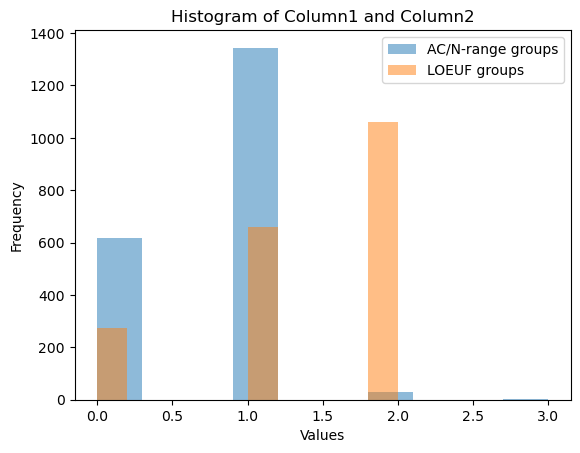

In [39]:
fig, ax = plt.subplots()

# Построение гистограмм для двух колонок на одной фигуре
ax.hist(genes_conserv['range_group_custom'], alpha=0.5, label='AC/N-range groups')
ax.hist(genes_conserv['range_group_loeuf'], alpha=0.5, label='LOEUF groups')

# Добавление легенды
ax.legend()

# Настройка отображения
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column1 and Column2')

# Отображение гистограмм
plt.show()

In [40]:
genes_conserv.to_csv('../data/processed_data/ac_expression_tables/genes_1.tsv', sep='\t', index=False)